# Uncovering Attrition Drivers

---


## Objective
*A brief statement on the goal of this notebook: to explore the cleaned dataset, visualize relationships between features, and identify key variables that influence employee attrition.*


###  **Import Required Libraries**
We begin by importing essential libraries for data manipulation, visualization, and evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  **Read the Cleaned Data**

Load the Cleaned HR employee attrition dataset for EDA. 

In [2]:
# Load the dataset
df = pd.read_csv('../resources/data/output/hr_employee_attrition_cleaned.csv')

In [3]:
df.shape

(1470, 35)

### **Exploratory Data Analysis (EDA)**

#### Remove Invariant and Identifier Columns

Certain columns either contain only a single unique value (invariant) or act as unique identifiers. These do not contribute to modeling or exploratory analysis and will be removed to simplify the dataset.

Columns to remove:
- EmployeeNumber (unique identifier)
- EmployeeCount (constant)
- StandardHours (constant)
- Over18 (constant)

In [4]:
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

In [5]:
df.shape

(1470, 31)

#### Numerical Columns

**Note:** Some features, though stored as integers, are actually ordinal or categorical. For example:
- Education: 1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor
- Satisfaction and involvement ratings: 1–4
- JobLevel, StockOptionLevel: Represent categorical levels, not continuous values

These will be treated as categorical/ordinal in EDA and potentially in modeling (e.g., using one-hot or ordinal encoding if required).

In [6]:
# Continuous variables
cont_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
             'TotalWorkingYears', 'TrainingTimesLastYear', 
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Ordinal features stored as numbers
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

#### Categorical Columns

In [7]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

#### **1. Descriptive Summary Statistics**

In [8]:
# Summary statistics for numerical columns
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0


#### Continuous Numerical Feature Summary

| Feature                 | Interpretation |
|-------------------------|---------------|
| **Age**                 | The employee ages range from 18 to 60, with a mean age of about 37. The interquartile range (IQR: 30 to 43) shows that most employees are in their 30s or early 40s, which is typical for a general workforce. |
| **DailyRate**           | Daily rates span from 102 to 1499, with an average of 802 and a high standard deviation (403). This suggests considerable variation in compensation, potentially due to differences in job roles or levels. |
| **DistanceFromHome**    | The average distance employees travel from home to work is about 9 km, with most (IQR: 2 to 14 km) living fairly close to their workplace. The maximum is 29 km, so few employees have a very long commute. |
| **HourlyRate**          | Hourly rates are distributed between 30 and 100, with a mean of about 66. The distribution appears fairly even, with moderate spread (std: 20).|
| **MonthlyIncome**       | Monthly incomes vary widely, from 1,009 to 19,999, with an average of 6,503. The high standard deviation (4,708) and a wide IQR (2,911 to 8,379) suggest significant income disparity, possibly reflecting different roles, levels, or tenure. |
| **MonthlyRate**         | The monthly wage rate also has a large range (2,094 to 26,999) and a mean of 14,313. The high spread (std: 7,118) may indicate diverse compensation packages. |
| **NumCompaniesWorked**  | Employees have worked at 0 to 9 companies before, with a mean of 2.7. Most have worked at one or two prior companies, but there are employees with a high number of prior employers, suggesting varied career histories. |
| **TotalWorkingYears**   | Work experience ranges from 0 to 40 years, with a mean of 11.3 years. The IQR (6 to 15) shows that the typical employee has significant experience, but there are some with very high or low experience levels. |
| **TrainingTimesLastYear** | The number of trainings attended last year ranges from 0 to 6, with an average of 2.8. Most employees attended 2 or 3 trainings, which may indicate a moderate emphasis on upskilling. |
| **YearsAtCompany**      | Tenure at the company varies from 0 to 40 years, with a mean of 7 years. The IQR (3 to 9) suggests that while many employees are relatively new, some have very long tenure. |
| **YearsInCurrentRole**  | Employees have held their current role from 0 to 18 years, with a mean of 4.2. The median is 3, indicating many employees are relatively early in their roles. |
| **YearsSinceLastPromotion** | Time since last promotion ranges from 0 to 15 years, with a mean of 2.2 years. The median is 1, meaning most employees have been promoted fairly recently, but some have not had a promotion in many years. |
| **YearsWithCurrManager** | Time with the current manager ranges from 0 to 17 years, with a mean of 4.1. The median is 3 years, showing many employees have not changed managers recently. |

**Observations:**
- Most features have a reasonable spread with a few possible outliers (e.g., very high values for tenure, income, or distance).
- Several features (YearsAtCompany, TotalWorkingYears) have maximum values much greater than the 75th percentile, suggesting the presence of long-tenure or highly experienced outliers.
- These statistics provide a foundation for further EDA, such as visualizing distributions and checking for relationships with attrition.

In [9]:
for col in ordinal_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())


Education value counts:
Education
1    170
2    282
3    572
4    398
5     48
Name: count, dtype: int64

EnvironmentSatisfaction value counts:
EnvironmentSatisfaction
1    284
2    287
3    453
4    446
Name: count, dtype: int64

JobInvolvement value counts:
JobInvolvement
1     83
2    375
3    868
4    144
Name: count, dtype: int64

JobLevel value counts:
JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

JobSatisfaction value counts:
JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64

PerformanceRating value counts:
PerformanceRating
3    1244
4     226
Name: count, dtype: int64

RelationshipSatisfaction value counts:
RelationshipSatisfaction
1    276
2    303
3    459
4    432
Name: count, dtype: int64

StockOptionLevel value counts:
StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

WorkLifeBalance value counts:
WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


#### Ordinal Feature Distributions

| Feature                  | Interpretation |
|--------------------------|----------------|
| **Education**            | Most employees hold a Bachelor’s (3) or Master’s (4) degree, with few at Doctorate (5) or below College (1); indicates a highly educated workforce. |
| **EnvironmentSatisfaction** | Ratings are mostly high (3 or 4); lower satisfaction is less common, suggesting generally positive perceptions of the work environment. |
| **JobInvolvement**       | Most rate their involvement as 3 or 2; few at the extremes, showing moderate engagement. |
| **JobLevel**             | Majority are in entry/mid-level positions (1 or 2); fewer in higher roles, reflecting a typical organizational pyramid. |
| **JobSatisfaction**      | Most employees are satisfied (3 or 4); low satisfaction (1 or 2) is less common. |
| **PerformanceRating**    | Nearly all have a rating of 3, few at 4; limited variance may reduce predictive power. |
| **RelationshipSatisfaction** | Most rate satisfaction as high (3 or 4); few are dissatisfied. |
| **StockOptionLevel**     | Majority at lower levels (0 or 1); higher levels are rare and may be reserved for senior staff. |
| **WorkLifeBalance**      | Most rate balance as good (3), with some at 2 or 4; very poor (1) is rare, indicating positive work-life perceptions. |

**Observation:**  
- Most ordinal features are skewed towards higher satisfaction and involvement, and the majority of employees are in lower to mid job levels. 
- Performance ratings show little variance, which may affect their usefulness as a predictive feature. These distributions highlight areas of organizational strength and opportunities for improvement.

In [10]:
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())


Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel value counts:
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: count, dtype: int64

Department value counts:
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: count, dtype: int64

EducationField value counts:
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: count, dtype: int64

Gender value counts:
Gender
Female    588
Male      882
Name: count, dtype: int64

JobRole value counts:
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative

| Feature         | Interpretation |
|-----------------|---------------|
| **Attrition**   | Most employees have not left the company (No: 1233 vs. Yes: 237), showing significant class imbalance (attrition rate ≈ 16%). |
| **BusinessTravel** | The majority travel rarely (1043); only a few travel frequently (277) or not at all (150). |
| **Department**  | Most employees are in Research & Development (961), followed by Sales (446); few in Human Resources (63). |
| **EducationField** | Most have backgrounds in Life Sciences (606) or Medical (464); other fields are much less represented. |
| **Gender**      | The workforce is male-dominated (882 males vs. 588 females). |
| **JobRole**     | Largest groups are Research Scientist (292), Sales Executive (326), and Laboratory Technician (259); smallest are Sales Representative (83) and Human Resources (52). |
| **MaritalStatus** | Majority are Married (673) or Single (470); fewer are Divorced (327). |
| **OverTime**    | Most employees do not work overtime (No: 1054); a significant minority do (Yes: 416). |


**Observations:**  
- Most categorical features are dominated by a few major groups—for example, the majority of employees work in Research & Development, have backgrounds in Life Sciences or Medical fields, and travel rarely for business.
- The dataset is male-dominated and most employees are married or single, reflecting typical workforce patterns in similar industries.
- Attrition is significantly imbalanced, with far fewer employees leaving the company compared to those staying—this class imbalance will require special attention during modeling.
- Job roles and departments are varied, but certain roles (such as Research Scientist, Sales Executive, and Laboratory Technician) make up the largest segments of the workforce.
- Overtime work is not the norm, but a substantial minority of employees do work overtime, which may be important for understanding attrition and satisfaction patterns.

#### **2. Univariate Analysis**

#### Continuous Features: Histograms

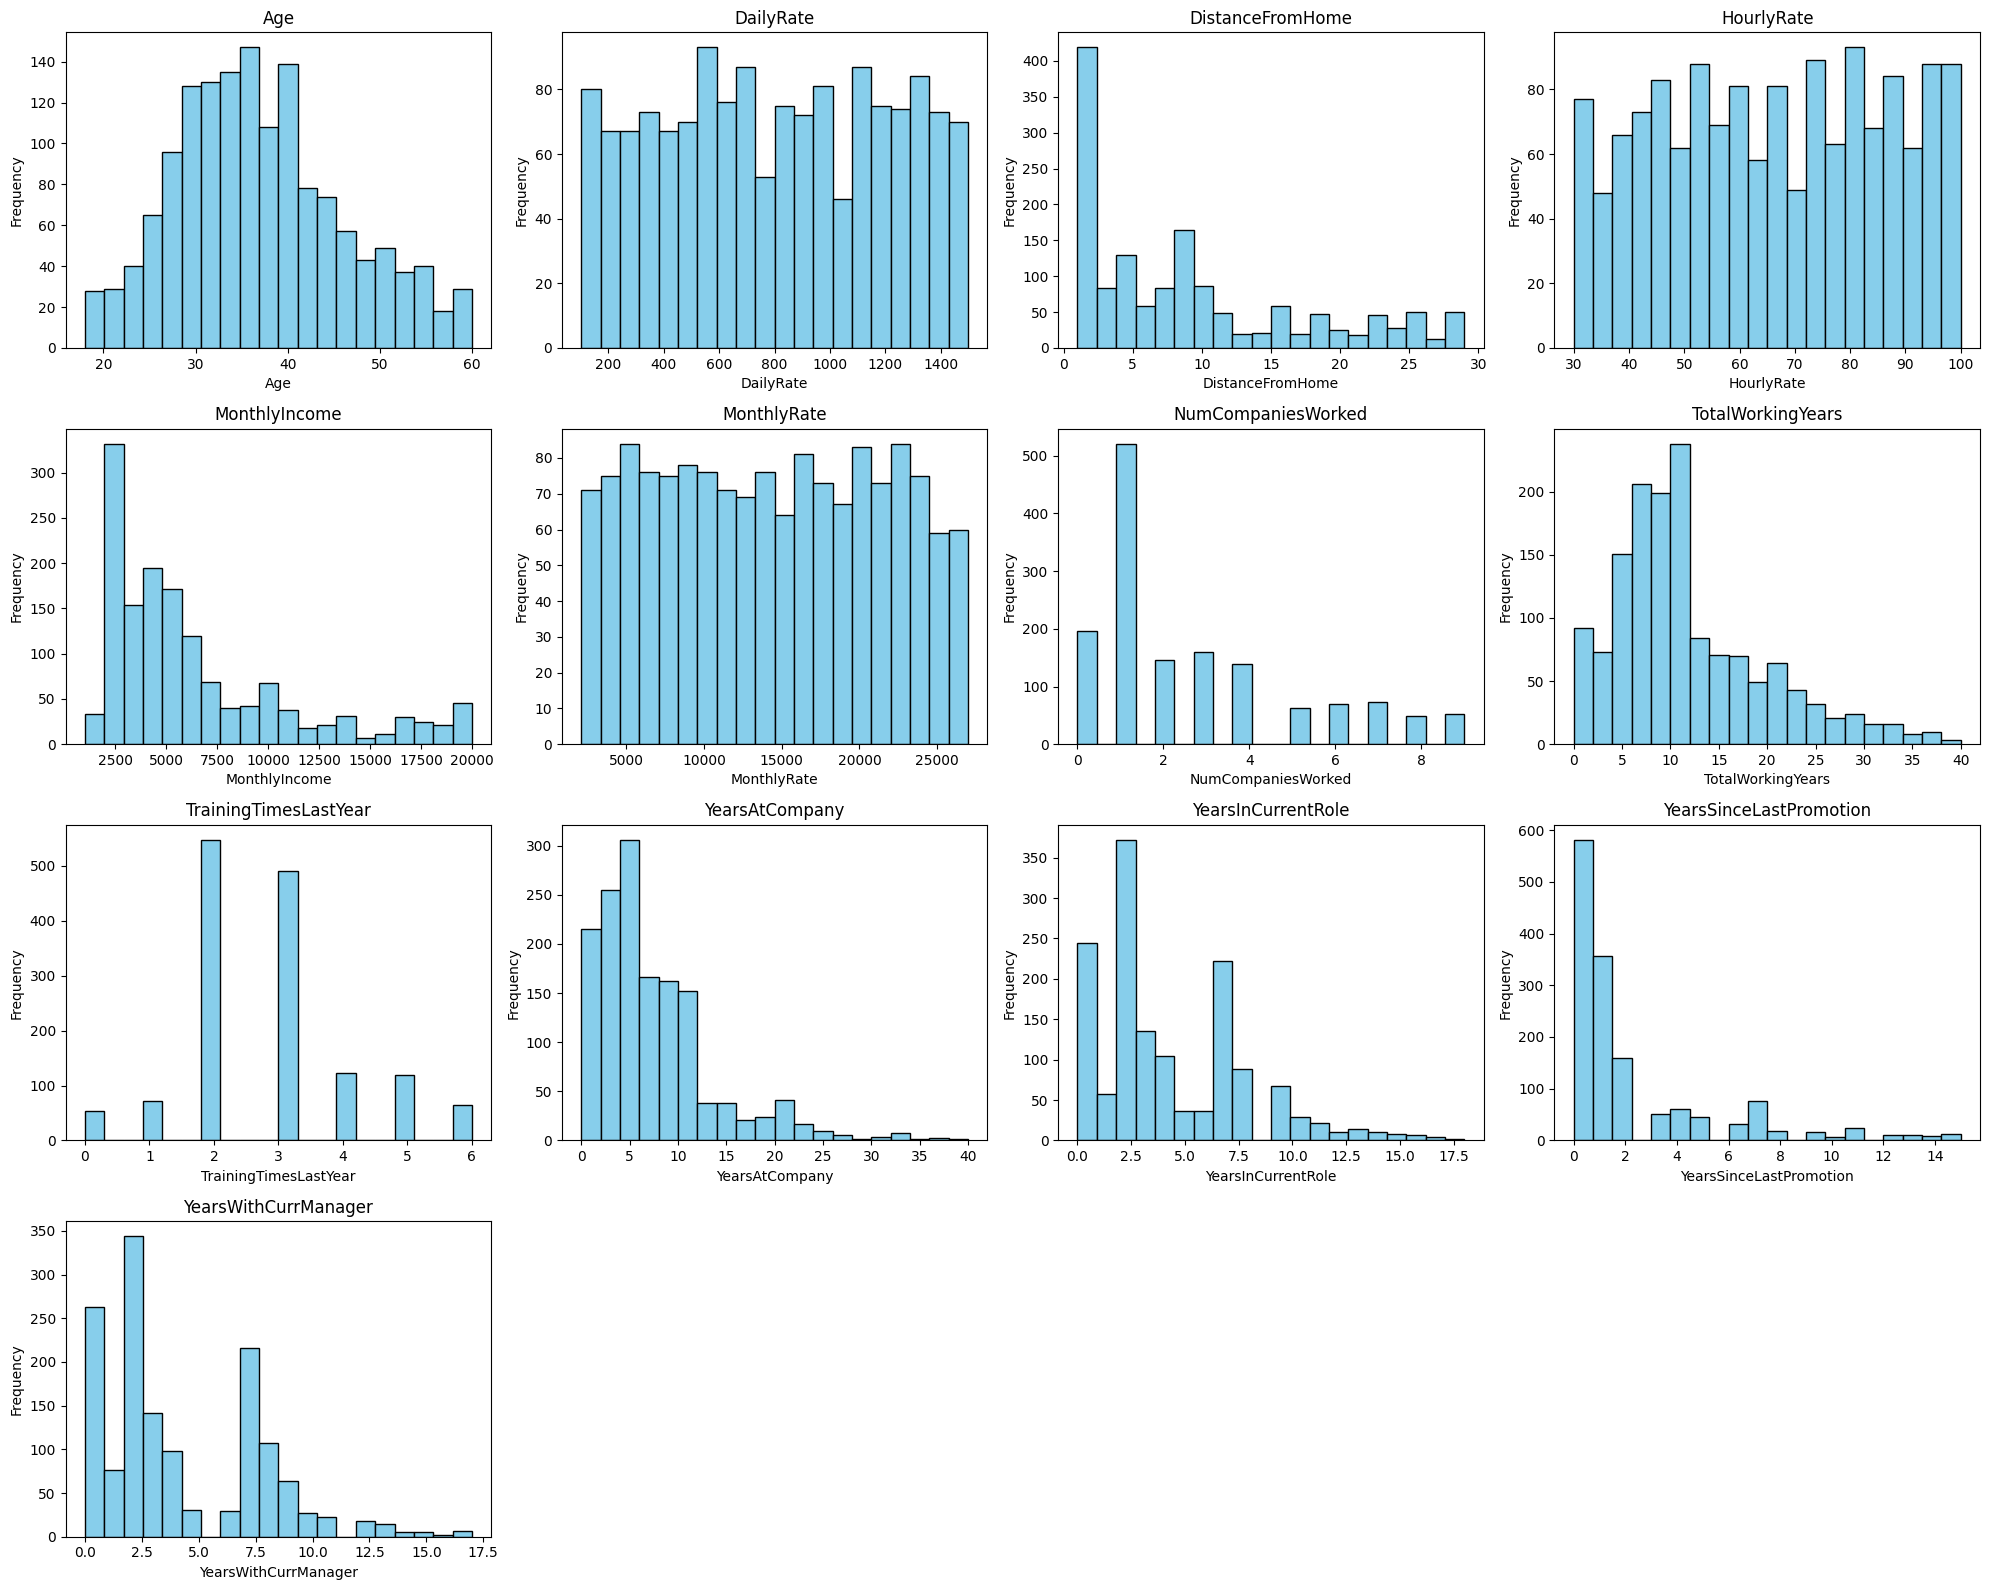

In [11]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

| Feature                     | Interpretation |
|-----------------------------|----------------|
| **Age**                     | Roughly normal distribution; most employees are in their 30s–40s, with fewer very young or very old employees. |
| **DailyRate**               | Fairly uniform distribution; wide range with no strong clustering at specific values. |
| **DistanceFromHome**        | Right-skewed; most employees live close to work, a minority commute long distances. |
| **HourlyRate**              | Nearly uniform; hourly rates are spread evenly across the range. |
| **MonthlyIncome**           | Strong right skew; most earn on the lower end, with a long tail of high earners. |
| **MonthlyRate**             | Almost uniform distribution, suggesting pay rates are widely spread. |
| **NumCompaniesWorked**      | Most have worked at 0–2 prior companies; some have much more varied career histories. |
| **TotalWorkingYears**       | Right-skewed; most have 5–15 years experience, few have long careers. |
| **TrainingTimesLastYear**   | Peaks at 2 and 3 trainings; these are the most common training frequencies. |
| **YearsAtCompany**          | Right-skewed; most employees are relatively new (<10 years), with some long-tenure outliers. |
| **YearsInCurrentRole**      | Most have held their current role less than 5 years; few have long-term incumbency. |
| **YearsSinceLastPromotion** | Heavily skewed to 0–1 years; promotions occur recently for many, few with long intervals since last promotion. |
| **YearsWithCurrManager**    | Most have been with their current manager less than 5 years; long-term relationships are uncommon. |

#### Ordinal Features: Bar Charts

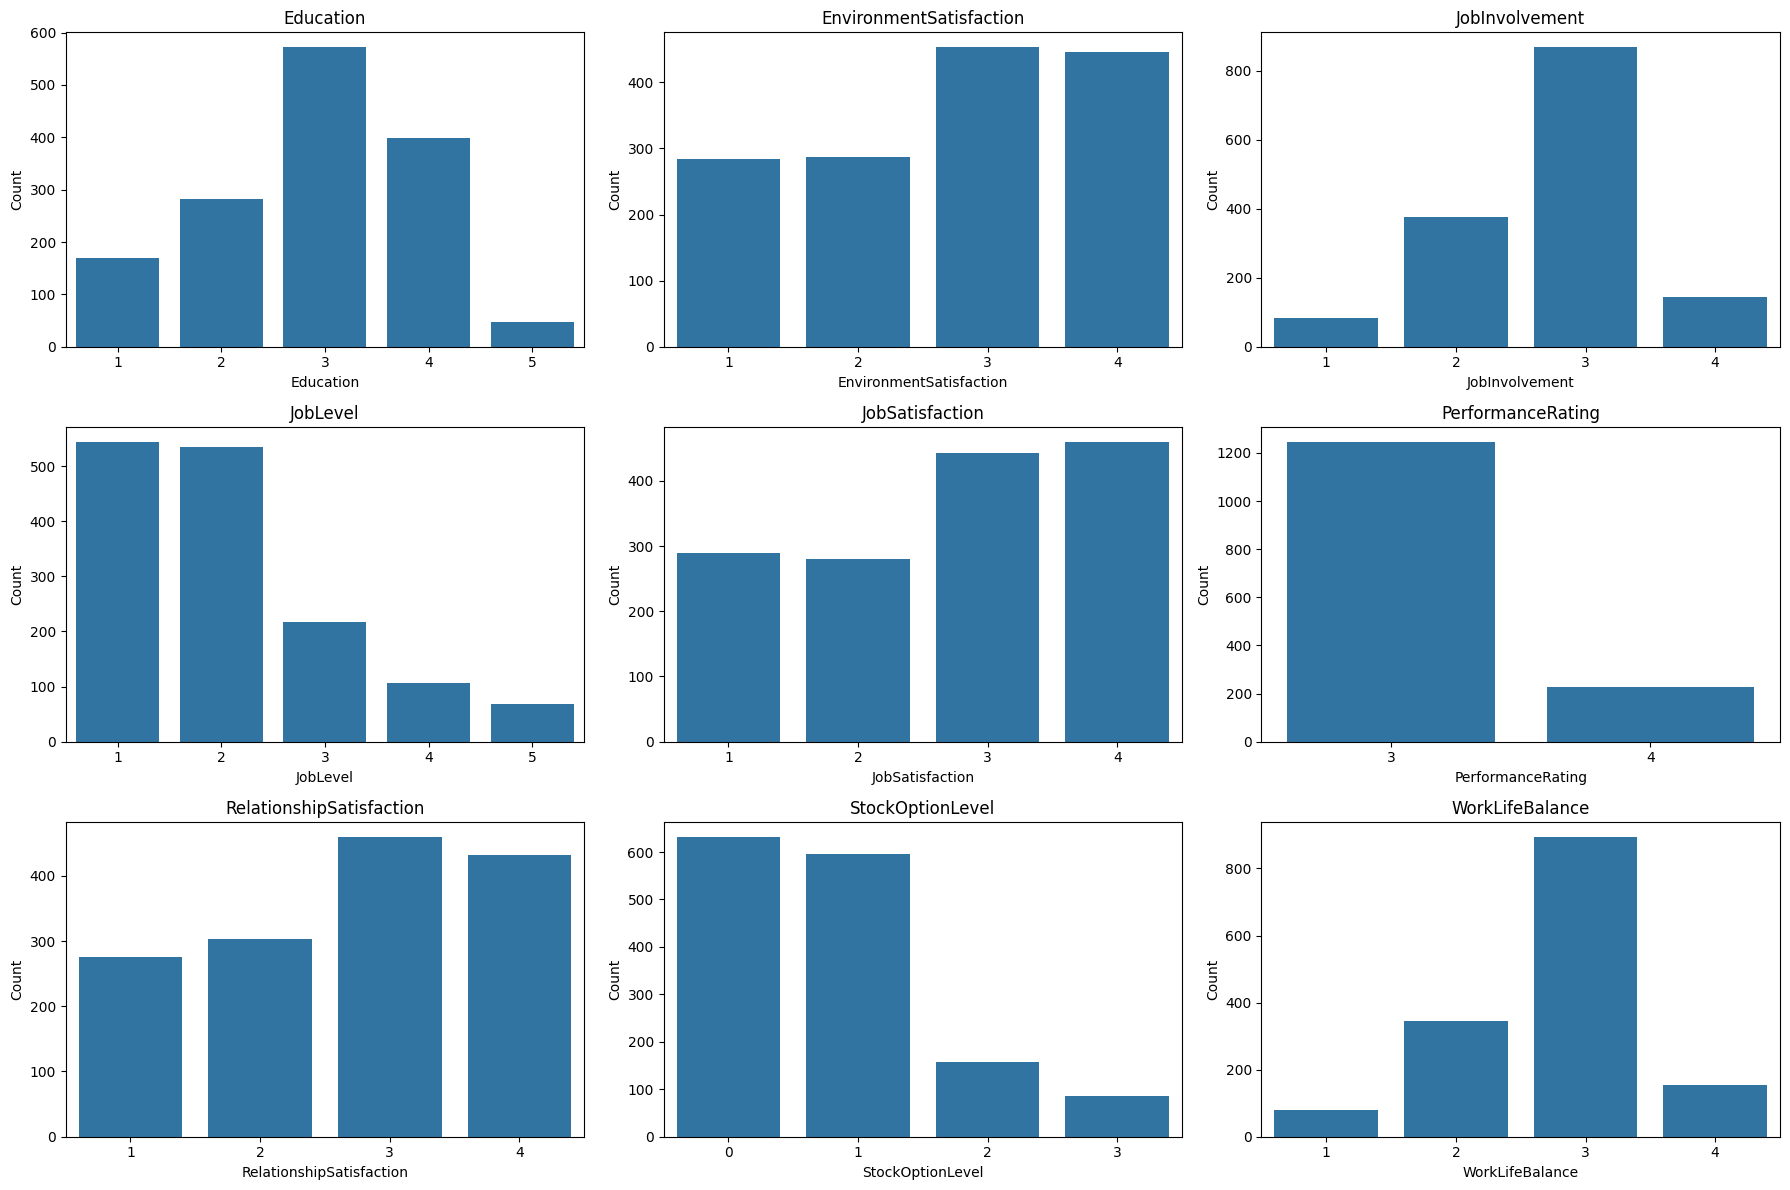

In [12]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

| Feature                    | Interpretation |
|----------------------------|----------------|
| **Education**              | Most employees hold a Bachelor’s (3) or Master’s (4) degree; very few have a Doctorate (5) or below College (1). Indicates a highly educated workforce. |
| **EnvironmentSatisfaction**| Satisfaction is skewed high; most employees rate 3 or 4, suggesting overall positive perceptions. |
| **JobInvolvement**         | The majority rate involvement at 3, with few at the extremes (1, 4). Most employees feel moderately involved. |
| **JobLevel**               | Most are in lower to mid job levels (1, 2); higher job levels (4, 5) are much less common, reflecting a typical organizational pyramid. |
| **JobSatisfaction**        | Most employees are satisfied (ratings 3 or 4); dissatisfaction (1, 2) is less frequent. |
| **PerformanceRating**      | Nearly all have a rating of 3; very few have a 4. Indicates low variance in performance appraisal. |
| **RelationshipSatisfaction**| Majority are satisfied (3, 4), with few rating low satisfaction (1, 2). Reflects positive workplace relationships. |
| **StockOptionLevel**       | Most are at level 0 or 1; higher levels are rare, possibly reserved for senior roles. |
| **WorkLifeBalance**        | Most employees rate their balance as 3; very few rate it as poor (1). Indicates a generally positive work-life perception. |

#### Categorical Features: Bar Charts

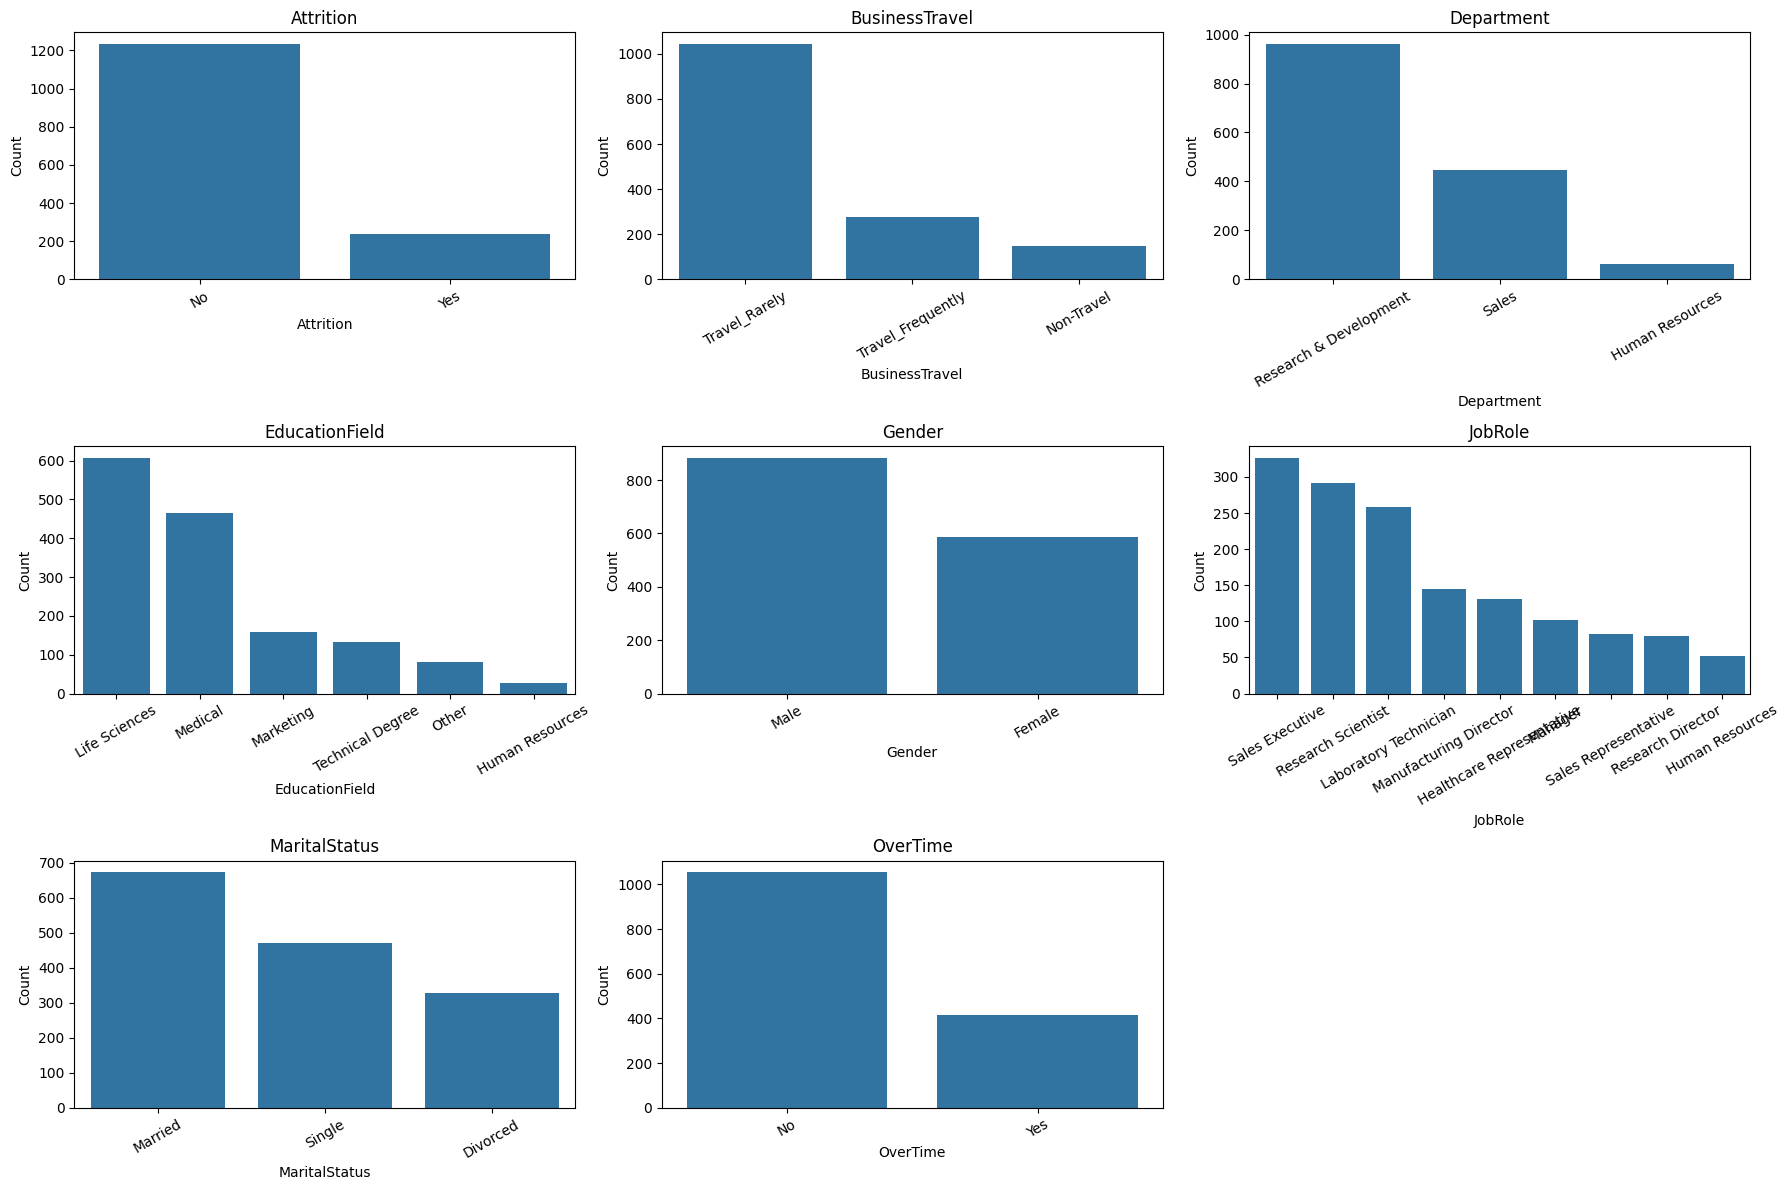

In [13]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
plt.show()

| Feature         | Interpretation |
|-----------------|----------------|
| **Attrition**   | Majority of employees have not left (No), while a smaller proportion have left (Yes), showing clear class imbalance. |
| **BusinessTravel** | Most employees travel rarely for business; fewer travel frequently or not at all. |
| **Department**  | Most employees are in Research & Development, followed by Sales; very few are in Human Resources. |
| **EducationField** | Workforce is mainly from Life Sciences or Medical fields; other education backgrounds are much less represented. |
| **Gender**      | The workforce is male-dominated, with significantly more males than females. |
| **JobRole**     | The largest groups are Sales Executive, Research Scientist, and Laboratory Technician; some roles have very few employees. |
| **MaritalStatus** | Most employees are married, followed by singles and then divorced individuals. |
| **OverTime**    | Most employees do not work overtime; a notable minority do, which may impact satisfaction or attrition. |

#### **2. Bivariate Analysis**

#### Continuous Features vs. Attrition (Boxplots or Violinplots)

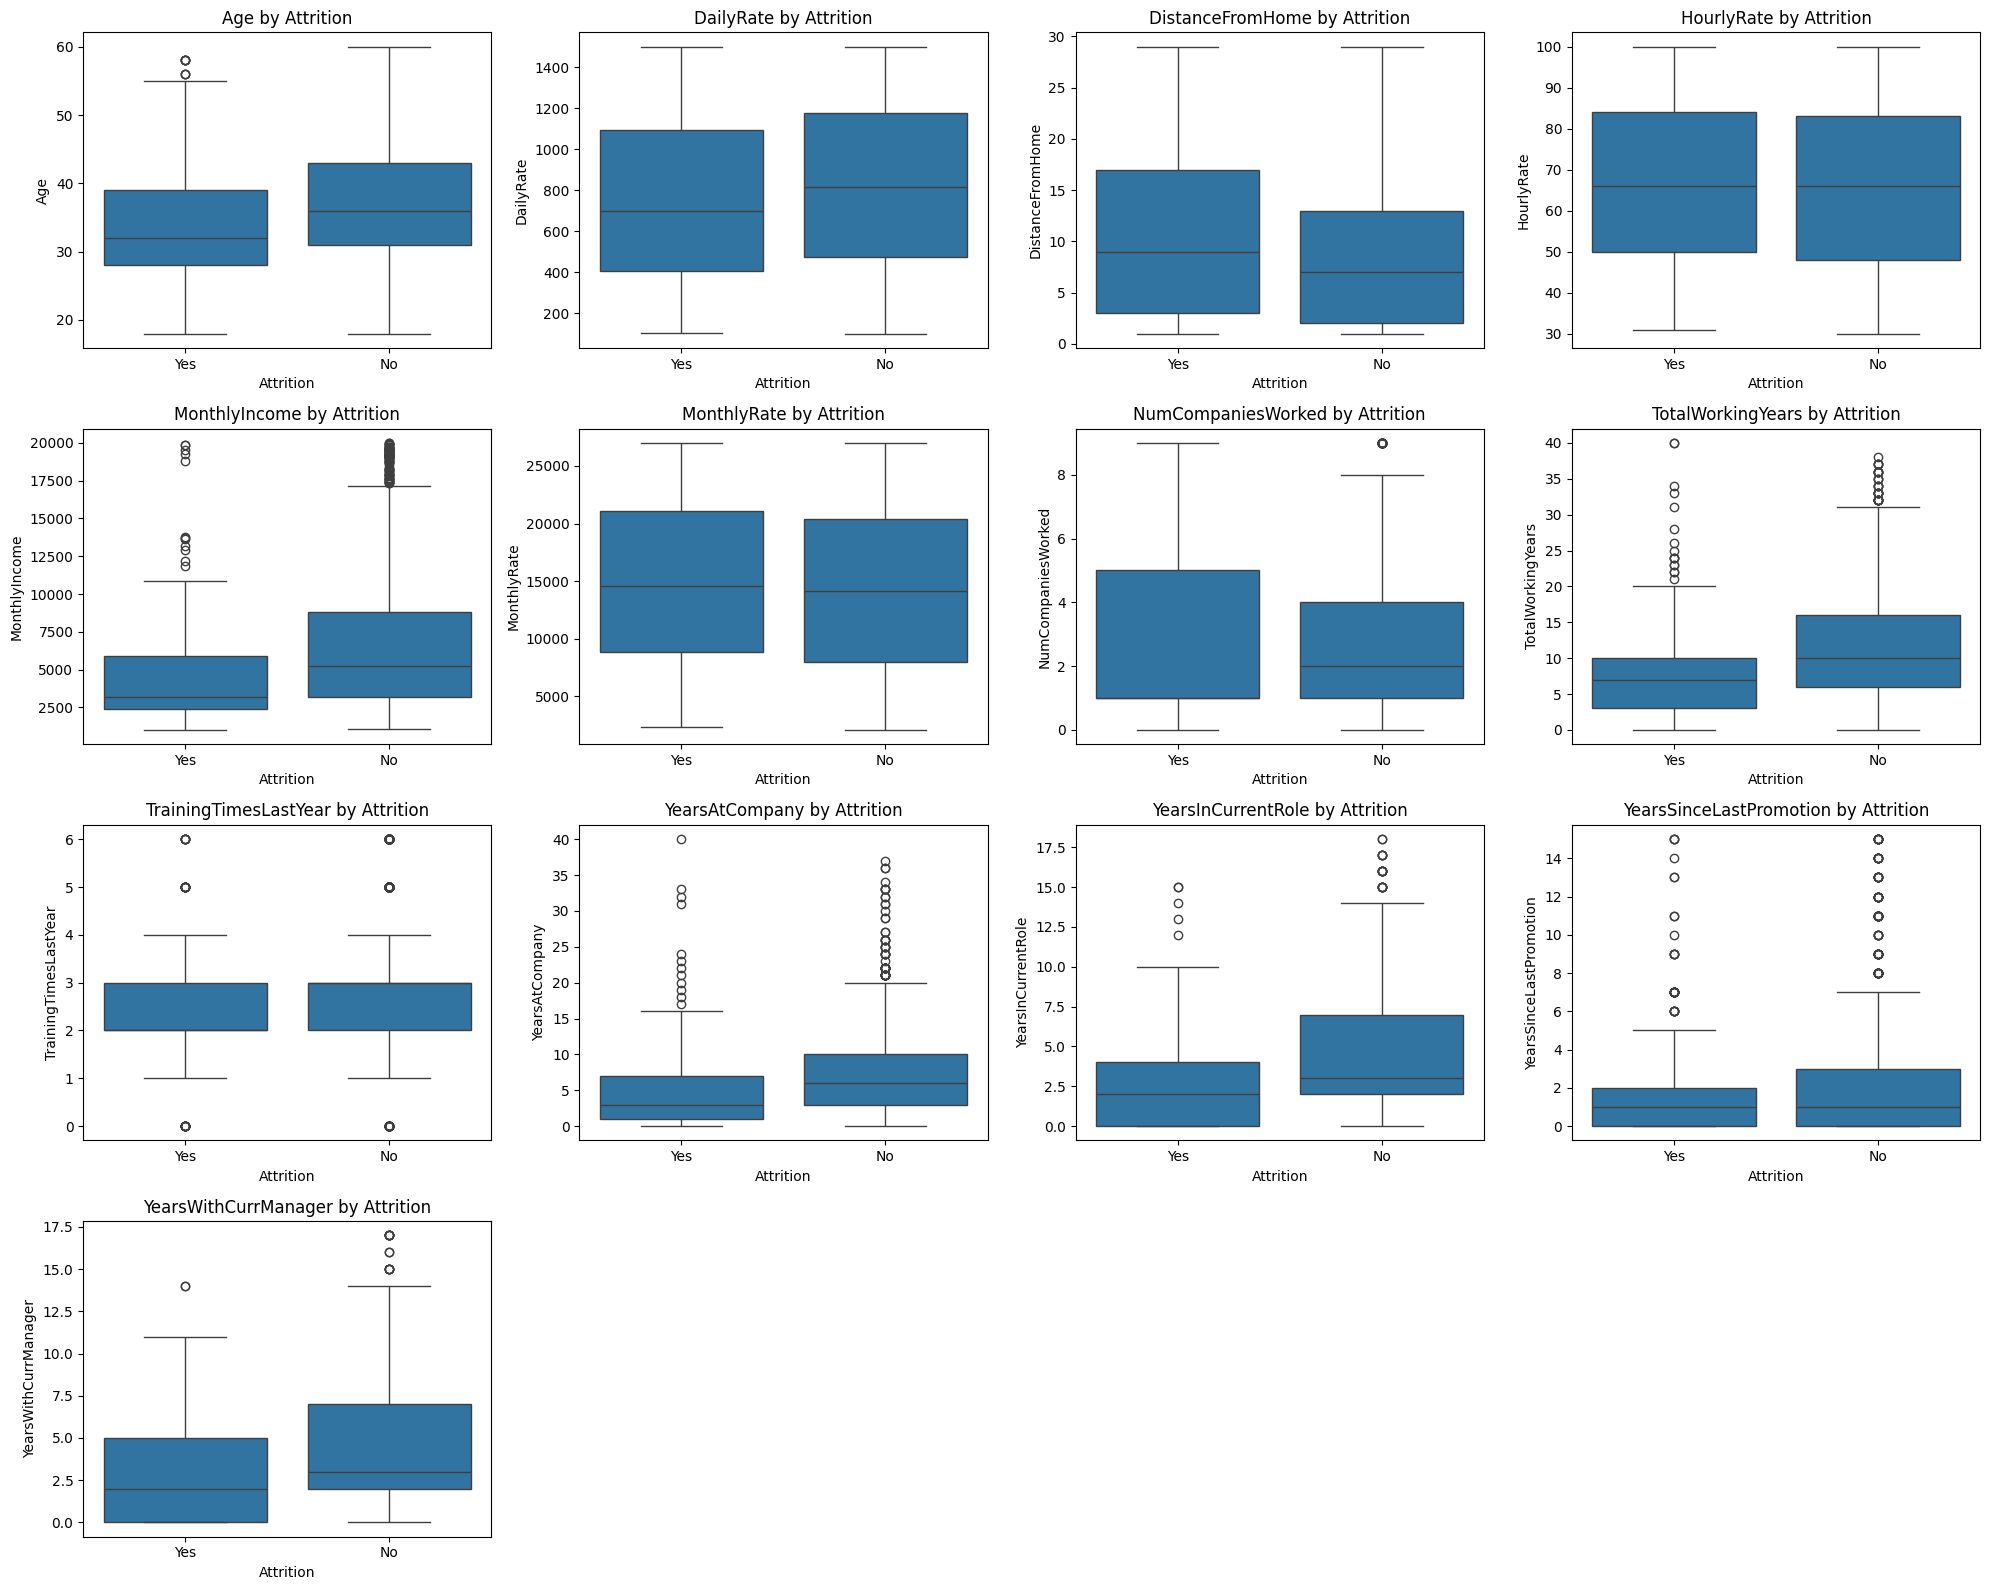

In [14]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

| Feature                   | Key Insights from Boxplots |
|---------------------------|---------------------------|
| **Age**                   | Employees who left ('Yes') are generally younger than those who stayed. |
| **DailyRate**             | No clear difference between attrition groups; pay distribution is similar. |
| **DistanceFromHome**      | Employees who left have a slightly higher median distance from home, but overlap is substantial. |
| **HourlyRate**            | Similar distributions for both groups; hourly pay does not differentiate attrition. |
| **MonthlyIncome**         | Employees who left tend to have lower monthly incomes, with noticeably lower median and fewer high earners. |
| **MonthlyRate**           | No notable difference by attrition; distributions nearly overlap. |
| **NumCompaniesWorked**    | Those who left have slightly more previous companies on average, suggesting job hopping may relate to attrition. |
| **TotalWorkingYears**     | Employees who left generally have fewer total working years than those who stayed. |
| **TrainingTimesLastYear** | Little difference between groups; training frequency does not appear to impact attrition. |
| **YearsAtCompany**        | Attrited employees typically have shorter tenures at the company. |
| **YearsInCurrentRole**    | Employees who left spent less time in their current role compared to those who stayed. |
| **YearsSinceLastPromotion** | Similar medians, but more outliers among non-attrition, indicating some employees stay long without promotion. |
| **YearsWithCurrManager**  | Employees who left have generally spent less time with their current manager. |

##### Analysis of Predictive Power among continuous features for Employee Attrition

| Predictive Power      | Feature                     | Justification / Observation                                                                                             |
|-----------------------|-----------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **High** | MonthlyIncome             | **Strongest signal.** The distribution for employees who left is significantly lower than for those who stayed. Minimal overlap. |
| **High** | TotalWorkingYears         | **Very strong signal.** Employees who left are heavily concentrated in the lower years of total experience.                   |
| **High** | Age                       | **Strong signal.** A clear visual separation shows that employees who left are generally younger.                         |
| **High** | YearsAtCompany            | **Strong signal.** Tenure at the company is much shorter for the group that experienced attrition.                        |
| **High** | YearsInCurrentRole        | **Strong signal.** Employees who left had spent significantly less time in their most recent role.                       |
| **High** | YearsWithCurrManager      | **Strong signal.** A shorter tenure with the current manager is highly correlated with leaving the company.               |
| **Moderate** | NumCompaniesWorked        | **Noticeable signal.** Those who left tend to have worked for more companies, but there is still substantial overlap.       |
| **Low / Negligible** | DistanceFromHome          | **Very weak signal.** Medians are slightly different, but the distributions overlap almost entirely.                      |
| **Low / Negligible** | DailyRate                 | **No signal.** The distributions for both groups are nearly identical.                                                   |
| **Low / Negligible** | HourlyRate                | **No signal.** Similar to DailyRate, the distributions are almost completely overlapping.                                 |
| **Low / Negligible** | MonthlyRate               | **No signal.** Like other rate-based pay metrics, this feature does not differentiate between the two groups.             |
| **Low / Negligible** | TrainingTimesLastYear     | **No signal.** The number of training sessions attended is very similar for both employees who left and stayed.           |
| **Low / Negligible** | YearsSinceLastPromotion   | **No signal.** The core distributions are almost the same, indicating this is not a primary driver of attrition.        |

#### Ordinal Features vs. Attrition (Grouped Countplots)

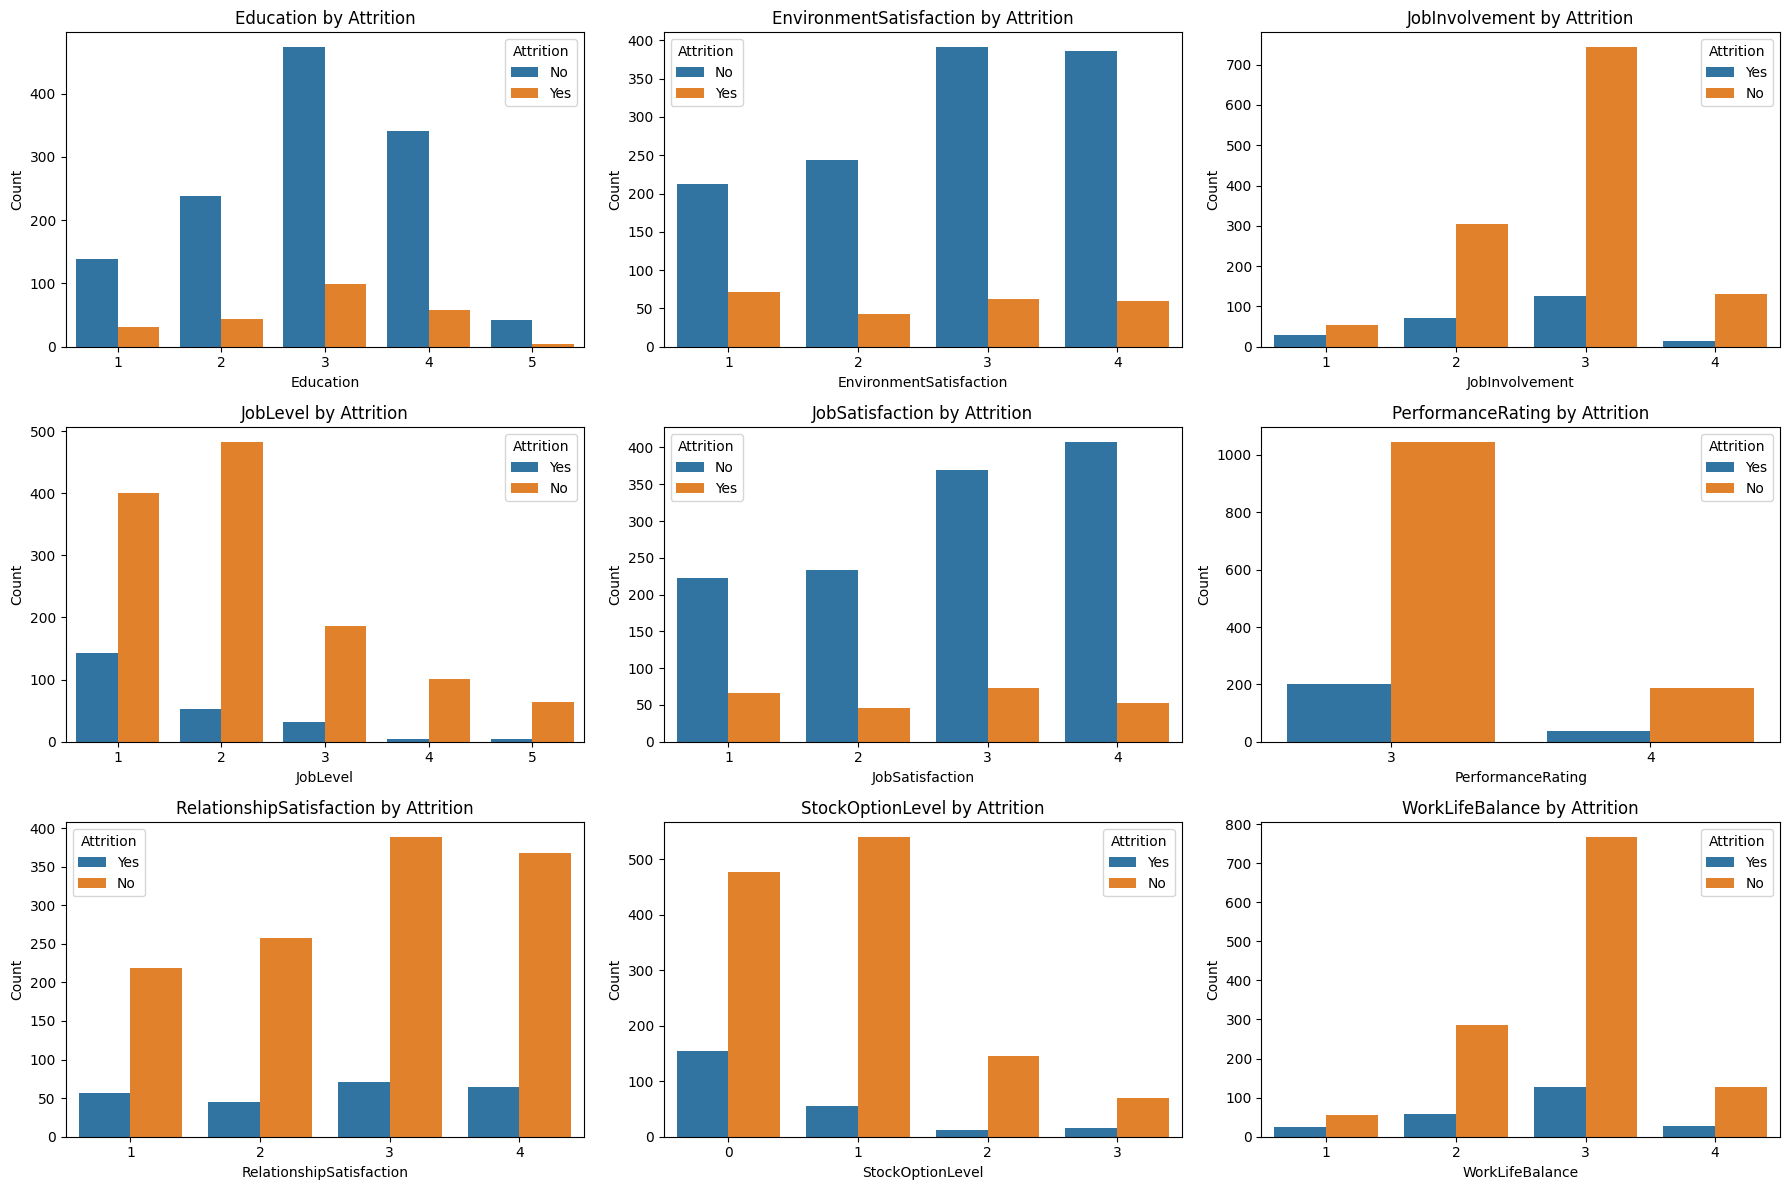

In [15]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Attrition', data=df,  order=sorted(df[col].unique()))
    plt.title(f'{col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Attrition')
    plt.tight_layout()
plt.show()

| Feature                    | Interpretation (by Attrition) |
|----------------------------|-------------------------------|
| **Education**              | Attrition is slightly higher among employees with lower education levels, but overall, education does not show a strong pattern with attrition. |
| **EnvironmentSatisfaction**| Employees with lower environment satisfaction ratings (1 or 2) are more likely to leave compared to those with higher satisfaction (3 or 4). |
| **JobInvolvement**         | Attrition is higher among employees with lower job involvement scores. Employees with high involvement are less likely to leave. |
| **JobLevel**               | Most attrition occurs at lower job levels (1 and 2). Higher job levels have lower attrition, suggesting senior employees are more likely to stay. |
| **JobSatisfaction**        | Employees with lower job satisfaction (1 or 2) are more likely to leave, indicating that satisfaction is a key factor for retention. |
| **PerformanceRating**      | Attrition does not vary much with performance rating due to low variance in ratings (most are 3). |
| **RelationshipSatisfaction**| Lower relationship satisfaction correlates with higher attrition; higher satisfaction (3 or 4) is associated with staying. |
| **StockOptionLevel**       | Attrition is more frequent among those with lower or no stock options (0 or 1). Higher stock option levels see less attrition. |
| **WorkLifeBalance**        | Employees rating work-life balance as poor (1 or 2) show higher attrition compared to those with better work-life balance (3 or 4). |

##### Analysis of Predictive Power among ordinal features for Employee Attrition

| Predictive Power         | Feature                  | Justification / Observation                                                                                                                      |
|-------------------------|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **High**                | EnvironmentSatisfaction  | **Strong signal.** Attrition is much higher at lower satisfaction levels (1) and much lower at higher levels (3, 4).                             |
| **High**                | JobInvolvement           | **Strong signal.** Employees with higher job involvement have significantly lower attrition; those with low involvement are much more likely to leave. |
| **High**                | JobLevel                 | **Strong signal.** Attrition is heavily concentrated among lower job levels (1, 2). Senior employees (levels 3, 4, 5) rarely leave.              |
| **High**                | JobSatisfaction          | **Strong signal.** Lower satisfaction scores (1, 2) are associated with much higher attrition. Satisfied employees (3, 4) mostly stay.           |
| **High**                | StockOptionLevel         | **Strong signal.** Attrition is highest among those with no stock options (0), and falls as stock option levels increase.                        |
| **High**                | WorkLifeBalance          | **Strong signal.** Employees with poor work-life balance (1, 2) show markedly higher attrition. Those with good balance (3, 4) stay more.        |
| **High**                | RelationshipSatisfaction | **Clear signal.** Lower satisfaction is linked to higher attrition; high satisfaction is linked to retention.                                    |
| **Low / Negligible**    | Education                | **No signal.** Attrition rates are similar across education levels. No strong pattern observed.                                                  |
| **Low / Negligible**    | PerformanceRating        | **No signal.** Minimal variance (most rated '3'), so this feature offers almost no predictive power for attrition.                               |

#### Categorical Features vs. Attrition (Grouped Countplots)

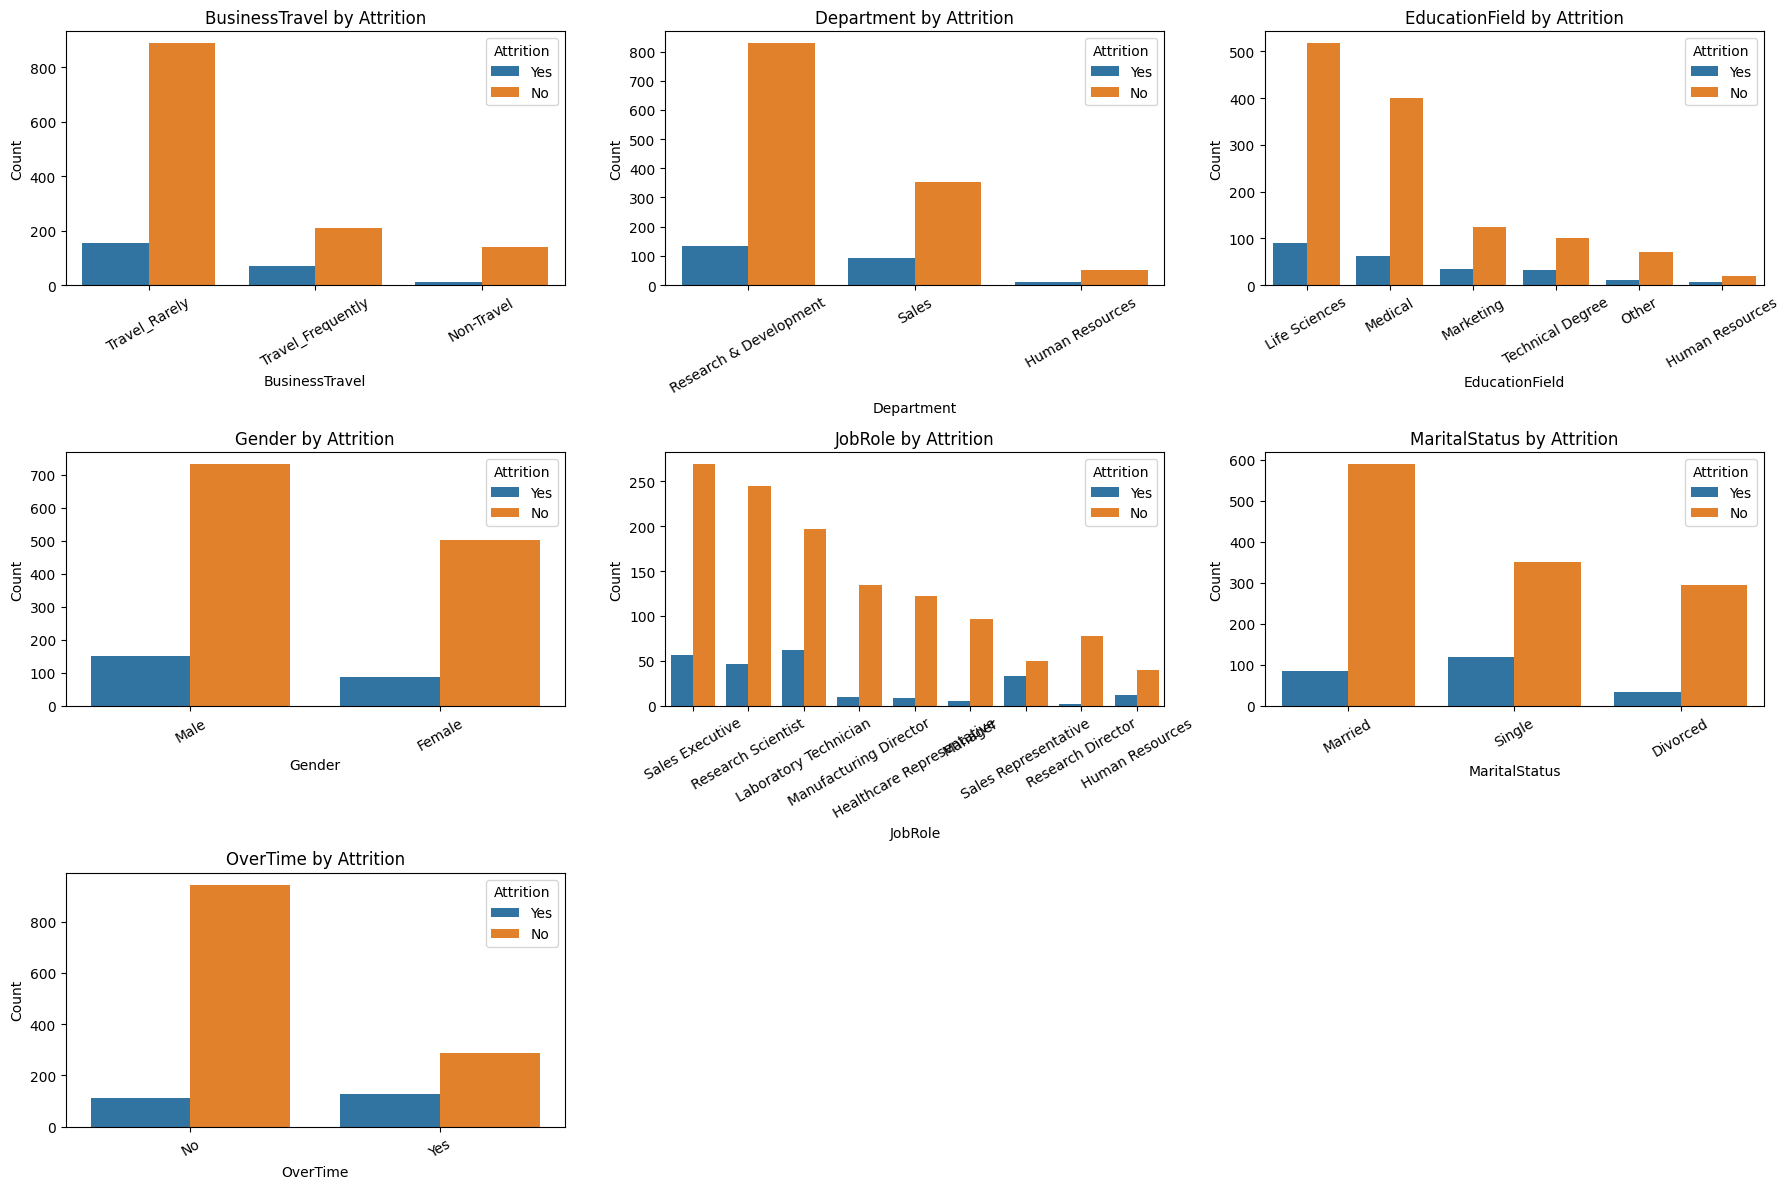

In [16]:
# Exclude 'Attrition' from categorical_cols if present
categorical_cols_no_target = [col for col in categorical_cols if col != 'Attrition']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols_no_target, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Attrition', data=df, order=df[col].value_counts().index)
    plt.title(f'{col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Attrition')
    plt.tight_layout()
plt.show()

| Feature           | Interpretation (by Attrition) |
|-------------------|-------------------------------|
| **BusinessTravel** | Employees who travel frequently for business have a higher attrition rate than those who rarely or never travel. |
| **Department**     | Attrition is slightly higher in Sales and Human Resources compared to Research & Development, but overall differences are not dramatic. |
| **EducationField** |While attrition occurs across all fields, the rate of attrition is noticeably higher for employees with an education in 'Technical Degree', 'Human Resources', and 'Marketing'. Conversely, employees from the 'Life Sciences' and 'Medical' fields have a visibly lower proportion of attrition. |
| **Gender**         | Both males and females show attrition, but the overall workforce is male-dominated; no major difference in attrition by gender. |
| **JobRole**        | Attrition is distributed across job roles, but Sales Representatives and Laboratory Technicians show relatively higher attrition. |
| **MaritalStatus**  | Singles have a slightly higher proportion of attrition compared to married or divorced employees. |
| **OverTime**       | Employees who work overtime have a much higher attrition rate compared to those who do not, indicating overtime is a key risk factor. |

##### Analysis of Predictive Power among Categorical features for Employee Attrition

| Predictive Power      | Feature        | Justification / Observation                                                                                      |
|----------------------|---------------|------------------------------------------------------------------------------------------------------------------|
| **High**             | OverTime       | **Strongest signal.** Employees who work overtime have a dramatically higher attrition rate than those who do not.|
| **High**             | BusinessTravel | **Clear signal.** Employees who travel frequently for business show a much higher rate of attrition.              |
| **High**             | MaritalStatus  | **Strong signal.** 'Single' employees have a substantially higher attrition rate than 'Married' or 'Divorced.'   |
| **High**             | JobRole        | **Clear signal.** Certain roles, especially 'Sales Representative' and 'Laboratory Technician,' have visibly higher attrition rates. |
| **Moderate**         | Department     | **Noticeable signal.** Sales and HR have higher attrition rates than R&D, though the effect is less dramatic.     |
| **Low / Negligible** | Gender         | **No signal.** The attrition rate is nearly identical for both male and female employees.                        |
| **Low / Negligible** | EducationField | **No signal.** Differences in attrition rates across education fields are not significant.                        |

#### **3. Target Variable Distribution**

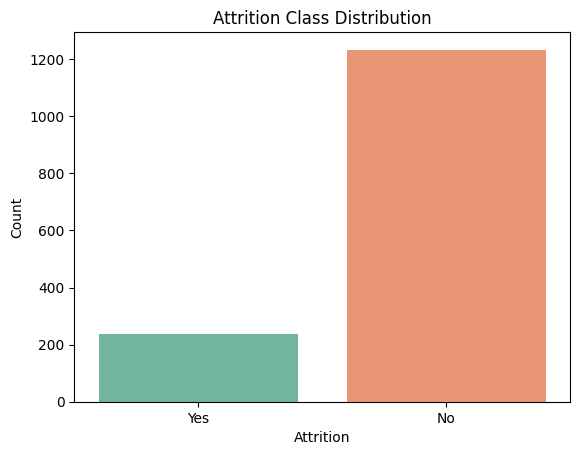

In [17]:
sns.countplot(x='Attrition', data=df, palette='Set2', hue='Attrition')
plt.title('Attrition Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

##### Interpretation of Attrition Class Distribution

This chart visualizes the distribution of our target variable, Attrition, and reveals a significant **class imbalance**.

**Key Observations:**
* **Majority Class ('No'):** The dataset contains approximately 1,233 records of employees who did not leave.
* **Minority Class ('Yes'):** There are only about 237 records of employees who did leave.
* **Attrition Rate:** This represents an approximate attrition rate of only **16%**, confirming that the 'Yes' class is heavily outnumbered.

**Implications for Modeling:**
This imbalance is a critical finding that must be addressed in the modeling phase.
1.  **Model Bias:** If left unhandled, models may become biased towards the majority class ('No'), achieving high accuracy but failing to predict actual attrition effectively.
2.  **Evaluation Metrics:** **Accuracy** will be a poor and misleading performance indicator. It is crucial to focus on metrics like **Precision, Recall, F1-Score**, and the **AUC-ROC curve**.
3.  **Strategies:** Techniques such as **SMOTE** (to oversample the minority class) or using `class_weight='balanced'` in algorithms like Logistic Regression and Random Forest will be necessary to build a robust model.

#### **4. Correlation Heatmap**

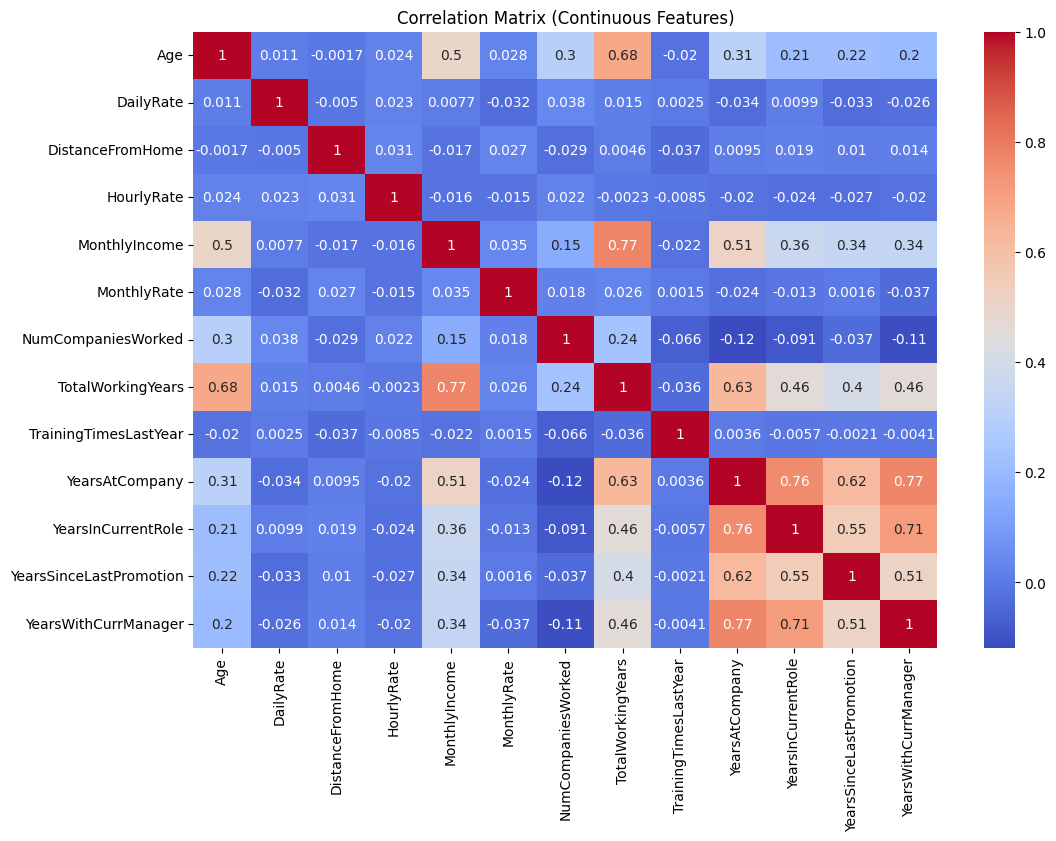

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df[cont_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Continuous Features)')
plt.show()

##### Correlation Matrix Analysis

A correlation matrix is used to investigate the linear relationship between continuous variables. The resulting heatmap helps to quickly identify features that are highly correlated, which is a key indicator of **multicollinearity**.

**Key Findings:**

* **Strong Positive Correlations (Tenure & Experience Cluster):** A group of features related to an employee's tenure are very strongly correlated with each other.
    * `TotalWorkingYears` and `Age`: **0.68**
    * `YearsAtCompany` and `TotalWorkingYears`: **0.63**
    * `YearsWithCurrManager` and `YearsAtCompany`: **0.77**
    * `YearsInCurrentRole` and `YearsAtCompany`: **0.76**
    * `YearsInCurrentRole` and `YearsWithCurrManager`: **0.71**

* **Strong Positive Correlations (Income & Experience Cluster):**
    * The strongest correlation is between `MonthlyIncome` and `TotalWorkingYears` (**0.77**), suggesting income is closely tied to experience.

* **Weak Correlations:**
    * `DailyRate`, `HourlyRate`, and `MonthlyRate` show almost no correlation with other key features, confirming they are likely weak predictors.


**Considerations for Modeling:**
- **Awareness of Multicollinearity:**  
  For linear models (e.g., Logistic Regression), strong correlations can lead to unstable or difficult-to-interpret coefficients. Therefore, in the modeling phase, We will review feature importance and consider removing or combining redundant tenure-related variables if they negatively affect model interpretability or performance.
- **Tree-Based Methods:**  
  Tree-based algorithms (such as Random Forest and XGBoost) handle correlated features better, so multicollinearity is less of a concern for those models. However, feature importance may be split across correlated features, which We will keep in mind when interpreting results.
- **Documentation:**  
  We will clearly document any decisions to drop or combine features due to high correlation, and discuss their impact on model performance and explainability as part of the final project deliverable.
- **Feature Engineering Opportunity:**  
  Since several features are correlated due to representing employee tenure in different ways, We may also experiment with combining them (e.g., by calculating tenure ratios or other composite metrics) and test if this improves model performance.

##### **Write Output**

We export the cleaned and well-documented dataset, with invariant and irrelevant columns removed. At this stage, all remaining features—including those identified as potentially strong or weak signals—are retained for further analysis. 

This version serves as the foundation for subsequent feature engineering and modeling. Final feature selection and transformation will be guided by the EDA findings, the modeling approach chosen, and validation results in the next steps of the project.

In [19]:
df.shape

(1470, 31)

In [20]:
# Save the cleaned dataset
df.to_csv('../resources/data/output/hr_employee_attrition_prepared.csv', index=False)

### **EDA Summary**

This Exploratory Data Analysis was conducted to understand the underlying patterns in the IBM HR Attrition dataset and identify key features associated with employee attrition. The analysis covered univariate and bivariate examinations of continuous, ordinal, and categorical variables.


**1. Data Structure and Quality**
- The HR dataset is clean, with no missing values and only a few invariant or irrelevant columns (which have been dropped).
- The dataset contains a mix of continuous, ordinal, and categorical features, allowing for a rich analysis.

**2. Target Variable (Attrition)**
- The target variable, Attrition, is highly imbalanced (~16% "Yes", ~84% "No"). This will require special consideration in modeling and evaluation metrics.

**3. Key Predictors Identified**
- Features showing the strongest relationship with attrition (via bivariate analysis and interpretation) include:  
  **OverTime, JobSatisfaction, JobLevel, StockOptionLevel, MaritalStatus, WorkLifeBalance, JobInvolvement, EnvironmentSatisfaction, and BusinessTravel.**
- Certain roles and departments (e.g., Sales Representative, Laboratory Technician, Sales) show higher attrition rates.
- Some features, such as Gender, Education, EducationField, and PerformanceRating, show little or no predictive power.

**4. Multicollinearity Observed**
- Tenure-related features (TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole) and MonthlyIncome are highly correlated.  
  This will be addressed in the feature selection/modeling phase, especially for linear models.

**5. Data Distributions**
- Many continuous and ordinal features are right-skewed (e.g., YearsAtCompany, MonthlyIncome), and some contain potential outliers.
- Most satisfaction-related features are skewed toward higher (positive) values, but attrition is more likely at lower satisfaction levels.

**6. Business Insights**
- Overtime work, low satisfaction, low job level, and lack of stock options are important signals for employee attrition.
- Employees who travel frequently for business or are single also have higher attrition rates.
- These findings align with HR literature and suggest actionable focus areas for retention efforts.

The EDA has successfully identified several strong potential predictors for attrition, primarily related to job satisfaction, work-life balance, overtime, and an employee's career stage (age, income, tenure). The identified issues of class imbalance and multicollinearity are critical and will require strategic handling during feature selection and model training to build a robust and reliable predictive model.